<a href="https://colab.research.google.com/github/viggopatel/QM2-real/blob/main/Gini_x_Pirate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%%capture
!pip install Basemap
!pip install ipyleaflet

In [2]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pylab
from datetime import datetime

%matplotlib inline
pylab.rcParams['figure.figsize'] = (10, 8)

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df1 = pd.read_csv('/content/drive/MyDrive/Viggo IMB-Piracy attacks dataset-v4 - data-for-countries-etc-by-year.csv')
df2 = pd.read_csv('/content/drive/MyDrive/GINI2.csv')

In [6]:
df1['Year'] = df1['Year'].astype(str)
df1 = df1[df1['Year'] < '2021']
df1

,geo,name,Year,Number of pirate attacks,Latitude,Longitude
0,dza,Algeria,2012,1,28.0339° N,1.6596° E
1,dza,Algeria,2013,0,28.0339° N,1.6596° E
2,dza,Algeria,2014,0,28.0339° N,1.6596° E
3,dza,Algeria,2015,0,28.0339° N,1.6596° E
4,dza,Algeria,2016,0,28.0339° N,1.6596° E
...,...,...,...,...,...,...
484,vnm,Vietnam,2017,2,14.0583° N,108.2772° E
485,vnm,Vietnam,2018,4,14.0583° N,108.2772° E
486,vnm,Vietnam,2019,2,14.0583° N,108.2772° E
487,vnm,Vietnam,2020,4,14.0583° N,108.2772° E


In [6]:
df2

,country,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,Latitutde,Longitude
0,Algeria,28.1,27.6,27.4,27.3,27.3,27.3,27.3,27.3,27.3,27.3,27.9,28.0339° N,1.6596° E
1,Angola,44.3,45.1,46.0,46.8,47.7,48.5,49.4,50.3,51.3,51.3,52.1,11.2027° S,17.8739° E
2,Bangladesh,32.1,32.2,32.2,32.3,32.3,32.4,32.4,32.4,32.4,32.4,33.0,24°N,90°E
3,Benin,42.8,43.4,44.5,45.5,46.6,47.8,48.1,48.1,48.1,48.1,48.8,9.3077° N,2.3158° E
4,Brazil,53.3,53.0,53.5,52.8,52.1,51.9,53.3,53.3,53.9,53.4,54.6,14.235° S,51.9253° W
5,Cameroon,44.4,45.0,45.5,46.1,46.6,46.7,46.7,46.7,46.7,46.7,47.4,7.3697° N,12.3547° E
6,China,43.8,42.4,42.2,39.7,39.2,38.6,38.5,38.5,38.5,38.5,39.1,35.8617° N,104.1954° E
7,Colombia,54.6,53.5,52.6,52.6,52.5,51.0,50.6,49.7,50.4,51.3,52.0,4.5709° N,74.2973° W
8,"Congo, Dem. Rep.",42.1,42.1,42.1,42.1,42.1,42.1,42.1,42.1,42.1,42.1,43.3,4.0383° S,21.7587° E
9,"Congo, Rep.",48.7,48.9,48.9,48.9,48.9,48.9,48.9,48.9,48.9,48.9,49.7,0.228° S,15.8277° E


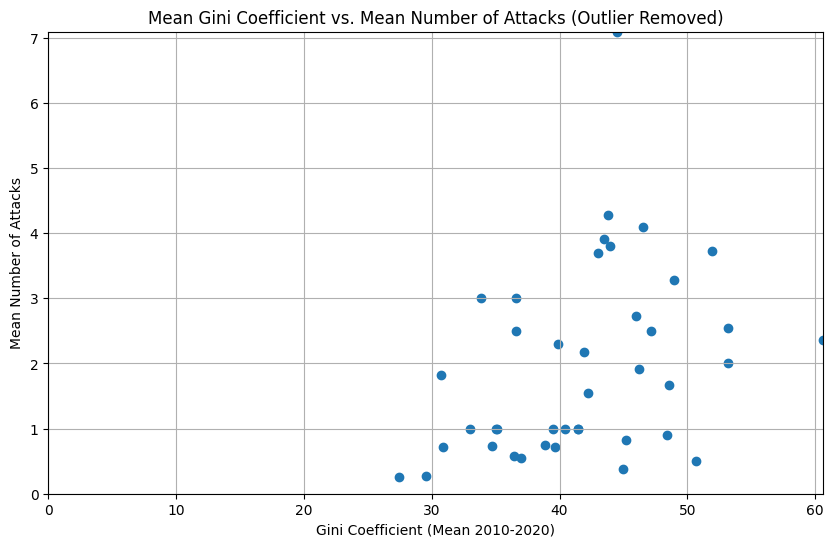

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Rename the 'Name' column to 'country' in df1
df1 = df1.rename(columns={'name': 'country'})

# Calculate the mean HDI for the years 2010-2020
gini_mean = df2.loc[:, '2010':'2020'].mean(axis=1)

# Convert hdi_mean to DataFrame with country as index, then reset index to have country as a column
gini_mean_df = pd.DataFrame(gini_mean, columns=['Gini_Mean']).set_index(df2['country']).reset_index()

# Calculate mean Pirate attacks, grouped by country and reset index to have country as a column
attacks_mean_df = df1.groupby('country')['Number of pirate attacks'].mean().reset_index()

# Merge the two DataFrames on country
merged_df = pd.merge(attacks_mean_df, gini_mean_df, on='country')

# Calculate IQR for 'Pirate attacks on boats'
Q1 = merged_df['Number of pirate attacks'].quantile(0.25)
Q3 = merged_df['Number of pirate attacks'].quantile(0.75)
IQR = Q3 - Q1

# Define upper and lower bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers
filtered_df = merged_df[(merged_df['Number of pirate attacks'] >= lower_bound) & (merged_df['Number of pirate attacks'] <= upper_bound)]

# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(filtered_df['Gini_Mean'], filtered_df['Number of pirate attacks'])  # Use 'Pirate attacks on boats' for y-axis
plt.xlabel('Gini Coefficient (Mean 2010-2020)')
plt.ylabel('Mean Number of Attacks')
plt.title('Mean Gini Coefficient vs. Mean Number of Attacks (Outlier Removed)')
plt.grid(True)

# Set axis limits to start at 0
plt.xlim(0, filtered_df['Gini_Mean'].max())
plt.ylim(0, filtered_df['Number of pirate attacks'].max())  # Use 'Pirate attacks on boats' for y-axis limit

plt.show()

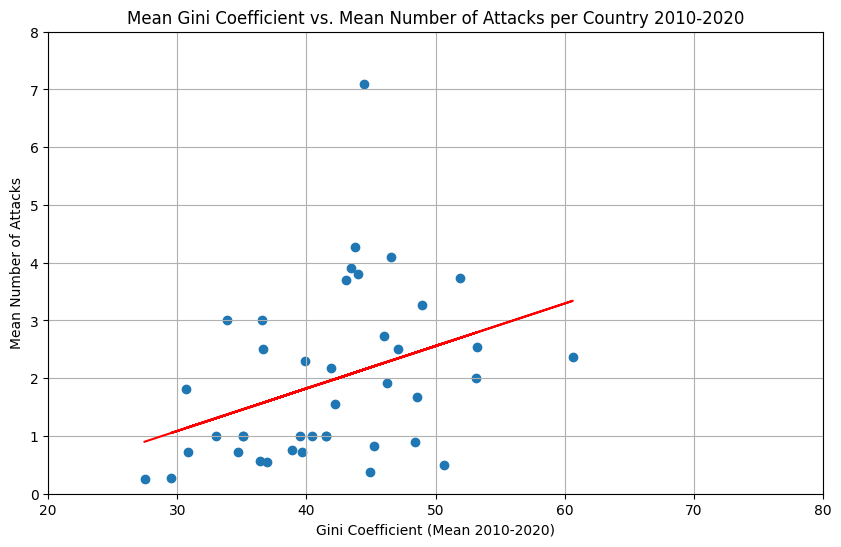

In [10]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pylab
from datetime import datetime
from google.colab import drive
# %%capture
# !pip install Basemap
# !pip install ipyleaflet

# Rename the 'Name' column to 'country' in df1
df1 = df1.rename(columns={'name': 'country'})

# Calculate the mean HDI for the years 2010-2020
gini_mean = df2.loc[:, '2010':'2020'].mean(axis=1)

# Convert hdi_mean to DataFrame with country as index, then reset index to have country as a column
gini_mean_df = pd.DataFrame(gini_mean, columns=['Gini_Mean']).set_index(df2['country']).reset_index()

# Calculate mean Pirate attacks, grouped by country and reset index to have country as a column
attacks_mean_df = df1.groupby('country')['Number of pirate attacks'].mean().reset_index()

# Merge the two DataFrames on country
merged_df = pd.merge(attacks_mean_df, gini_mean_df, on='country')

# ... (previous code for calculating and merging mean HDI and mean attacks)

# Calculate IQR for 'Pirate attacks on boats'
Q1 = merged_df['Number of pirate attacks'].quantile(0.25)
Q3 = merged_df['Number of pirate attacks'].quantile(0.75)
IQR = Q3 - Q1

# Define upper and lower bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers
filtered_df = merged_df[(merged_df['Number of pirate attacks'] >= lower_bound) & (merged_df['Number of pirate attacks'] <= upper_bound)]

# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(filtered_df['Gini_Mean'], filtered_df['Number of pirate attacks'])  # Use 'Pirate attacks on boats' for y-axis
plt.xlabel('Gini Coefficient (Mean 2010-2020)')
plt.ylabel('Mean Number of Attacks')
plt.title('Mean Gini Coefficient vs. Mean Number of Attacks per Country 2010-2020')
plt.grid(True)

# Calculate the line of best fit
m, b = np.polyfit(filtered_df['Gini_Mean'], filtered_df['Number of pirate attacks'], 1)

# Add the line of best fit to the plot
plt.plot(filtered_df['Gini_Mean'], m * filtered_df['Gini_Mean'] + b, color='red')


# Set axis limits
plt.xlim(20, 80)
plt.ylim(0, 8)

plt.show()

In [11]:
# prompt: provide a regression table for this variable

import statsmodels.api as sm

# ... (your existing code)

# Add a constant to the independent variable for the regression
X = sm.add_constant(filtered_df['Gini_Mean'])
y = filtered_df['Number of pirate attacks']

# Fit the OLS model
model = sm.OLS(y, X).fit()

# Print the regression table
print(model.summary())

                               OLS Regression Results                               
Dep. Variable:     Number of pirate attacks   R-squared:                       0.132
Model:                                  OLS   Adj. R-squared:                  0.110
Method:                       Least Squares   F-statistic:                     5.943
Date:                      Wed, 08 Jan 2025   Prob (F-statistic):             0.0194
Time:                              14:36:13   Log-Likelihood:                -70.193
No. Observations:                        41   AIC:                             144.4
Df Residuals:                            39   BIC:                             147.8
Df Model:                                 1                                         
Covariance Type:                  nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------